In [2]:
# Dependencies
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from pathlib import Path

In [3]:
# Copy the file path to reading 

file = Path(r'Source\adult.csv')

In [4]:
# Reading the CSV file in to the Pandas DataFrame 
df = pd.read_csv(file)
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
# df.columns

In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# Checking for the missing values 
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
# # Identify the duplicate values 
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [9]:
duplicate = df.drop_duplicates(inplace=True)
print(duplicate)

None


In [10]:
# Drop all rows with missing information
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [12]:
# df=pd.get_dummies(columns=['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
#        'hours.per.week', 'income', 'workclass_Federal-gov',
#        'workclass_Local-gov', 'workclass_Private',
#        'native.country_Portugal', 'native.country_Puerto-Rico',
#        'native.country_Scotland', 'native.country_South',
#        'native.country_Taiwan', 'native.country_Thailand',
#        'native.country_Trinadad&Tobago', 'native.country_United-States',
#        'native.country_Vietnam', 'native.country_Yugoslavia'] ,data=df)




In [13]:
# data = df
# data

In [14]:
# Verify dropped rows
df.count()

age               30139
workclass         30139
fnlwgt            30139
education         30139
education.num     30139
marital.status    30139
occupation        30139
relationship      30139
race              30139
sex               30139
capital.gain      30139
capital.loss      30139
hours.per.week    30139
native.country    30139
income            30139
dtype: int64

# for the data modeling 

We will doing the Algorithms such as:

logistic regression

decision trees

random forests

neural networks 

predictive modeling and classification

Confusin metrics 

In [79]:
# Importing the libraries for data modeling 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn import tree

In [16]:
# # Recognizing the numerical and categorical columns in dataset 

# numirical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
# print(numirical_cols )

# categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
# print(categorical_cols)

In [17]:
# identfing the numerical and categorical colums in dataset 

numeric_cols = df.select_dtypes(include=[np.number])
categorical_cols = df.select_dtypes(exclude=[np.number])

# print(numeric_cols)
print(categorical_cols)


      workclass     education      marital.status         occupation  \
1       Private       HS-grad             Widowed    Exec-managerial   
3       Private       7th-8th            Divorced  Machine-op-inspct   
4       Private  Some-college           Separated     Prof-specialty   
5       Private       HS-grad            Divorced      Other-service   
6       Private          10th           Separated       Adm-clerical   
...         ...           ...                 ...                ...   
32556   Private  Some-college       Never-married    Protective-serv   
32557   Private    Assoc-acdm  Married-civ-spouse       Tech-support   
32558   Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
32559   Private       HS-grad             Widowed       Adm-clerical   
32560   Private       HS-grad       Never-married       Adm-clerical   

        relationship   race     sex native.country income  
1      Not-in-family  White  Female  United-States  <=50K  
3          Unma

# Waht is heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

The color of each cell represents the strength and direction of the correlation, with darker colors indicating stronger correlations.

The relationship between two variables is generally considered strong when their r value is larger than 0.7

r is a value between [-1,1]

<Axes: >

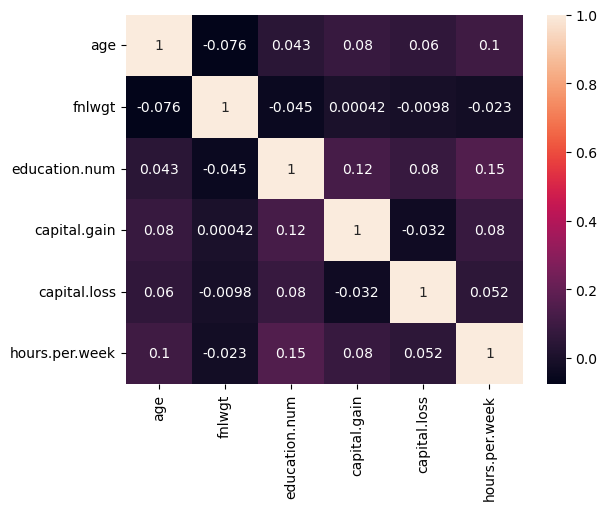

In [18]:
# Ploting a heatmap for understndin relationship between two varaibles 

sns.heatmap(data=numeric_cols.corr(),annot=True)

# Why do we use piplline 
Doing the pipeline include things like organizing your data, training models, and deploying them to make predictions. Pipelining is important because it helps you organize your machine learning workflows and makes your process faster. By linking different steps together, you can save time and effort.

# ML Pipline 
Organize Data

Train the model 

Evalute the model 

Deploy the model 

In [19]:
# Identify numerical and categorical columns from the dataset 

numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


In [20]:
# Preprocessing for numerical data: impute missing values and scale the data 

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [21]:
# Preprocessing for categorical data: impute missing values and encoding 

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [22]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'fnlwgt', 'education.num',
                                  'capital.gain', 'capital.loss',
                                  'hours.per.week']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['workclass', 'education', 'marital.status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native.country'])])

In [23]:
# Split the data into training and test sets
X = df.drop('income', axis=1)
y = df['income']
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States


In [24]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder

LabelEncoder()

In [25]:
# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [26]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [27]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

# What is accuracy 

Accuracy is a metric that measures how often a machine learning model correctly predicts the outcome

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy

0.8505308560053085

In [29]:
# Display results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8505308560053085
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4580
           1       0.71      0.64      0.67      1448

    accuracy                           0.85      6028
   macro avg       0.80      0.78      0.79      6028
weighted avg       0.85      0.85      0.85      6028



# Waht is accuracy 

 If you are working on a classification task with two classes, then 80% accuracy might not be good enough because you could potentially flip a coin and get 50% accuracy. However, if you are working on a 10-class classification task, then 80% accuracy might be quite good.

 # Classification Report 

The classification report provides a summary of the predictive performance of a classification model. It includes several metrics that evaluate different aspects of the model’s effectiveness. 

Precision:

Definition: Precision is the ratio of true positive predictions to the total number of positive predictions (both true and false positives). It answers the question: Of all instances the model predicted as positive, how many were actually positive?
Formula: 
Precision = TP/TP+FP

Recall:
Definition: Recall (or sensitivity) is the ratio of true positive predictions to the total number of actual positives (true positives and false negatives). It answers the question: Of all actual positive instances, how many did the model correctly identify?
Famula:
Recall= TP/TP+FN
F1-Score:
Definition: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, especially useful when the classes are imbalanced.
Farmula:
F1-Score = 2 . Precision*Recall/Precision+Recall

# Classes Reports

# Class 0

Precision: 0.89
Interpretation: Out of all instances predicted as class 0, 89% were correctly classified.
Recall: 0.92
Interpretation: Out of all actual class 0 instances, 92% were correctly identified by the model.
F1-Score: 0.90
Interpretation: The harmonic mean of precision and recall is 0.90, indicating a good balance between precision and recall for class 0.
Support: 4580
Interpretation: There are 4580 instances of class 0 in the dataset.

# Class 1 

Precision: 0.71
Interpretation: Out of all instances predicted as class 1, 71% were correctly classified.
Recall: 0.64
Interpretation: Out of all actual class 1 instances, 64% were correctly identified by the model.
F1-Score: 0.67
Interpretation: The harmonic mean of precision and recall is 0.67, indicating some room for improvement in balancing precision and recall for class 1.
Support: 1448
Interpretation: There are 1448 instances of class 1 in the dataset.
 


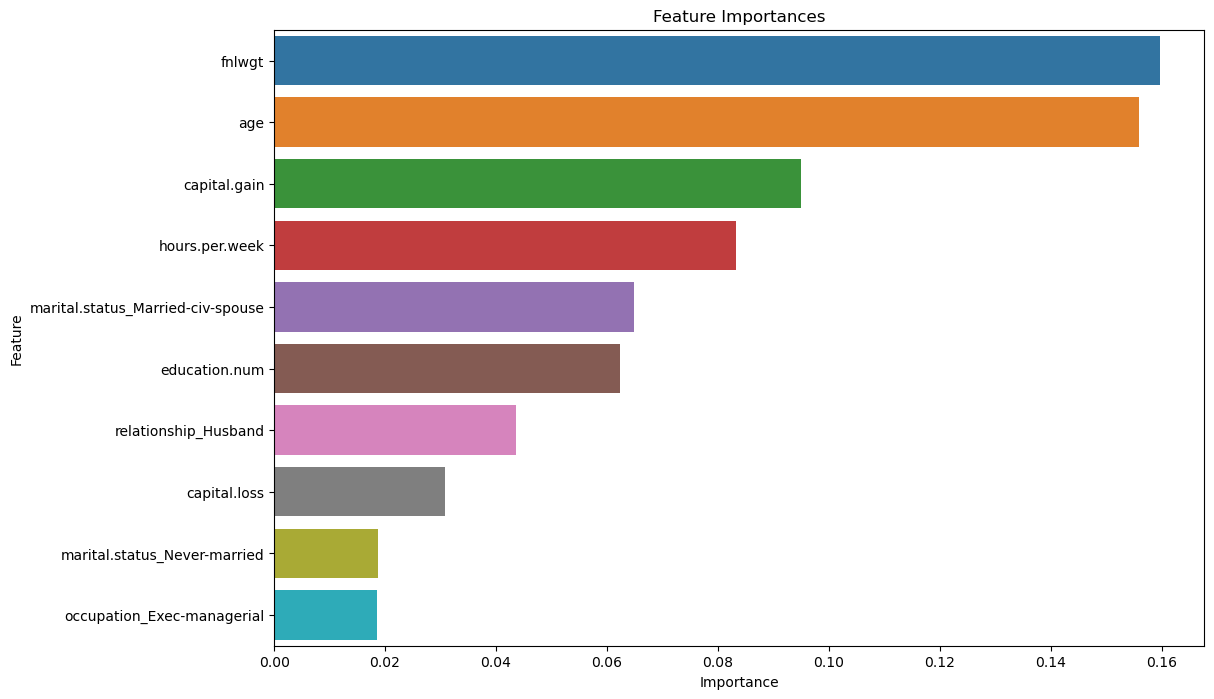

                              Feature  Importance
1                              fnlwgt    0.159640
0                                 age    0.155947
3                        capital.gain    0.094905
5                      hours.per.week    0.083221
31  marital.status_Married-civ-spouse    0.064916
2                       education.num    0.062383
50               relationship_Husband    0.043533
4                        capital.loss    0.030716
33       marital.status_Never-married    0.018771
39         occupation_Exec-managerial    0.018523


In [30]:
# Extract feature importances from the Random Forest model

importances = model.named_steps['classifier'].feature_importances_
feature_names = numerical_cols + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_cols))
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the feature importances by descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(10)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the sorted feature importances
print(feature_importances.head(10))

# Report 
The feature importance values provided indicate how much each feature contributes to the model's predictive power. Higher values suggest greater influence on the model's predictions

# What is encoding 

Target encoding works by converting each category of a categorical feature into its corresponding expected value. The approach to calculating the expected value will depend on the value you are trying to predict. For Regression problems, the expected value is simply the average value for that category.

The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables

c:\Users\bakts\OneDrive\Desktop\images-ML.png

# Waht is target variable?
A target variable is the variable or metric you're trying to predict with a supervised machine learning model. It is also often called the dependent variable, the response variable, the 'y' variable, or even simply the model output

# How does the industry sector impact income levels?

Tring to get the answer for this research question 


In [31]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [38]:
df[['income' , 'workclass']]

df['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [39]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

# Linear Regrission


In [91]:
# Encoding  workclass and income columns
label_encoder_workclass = LabelEncoder()
df['workclass_encoded'] = label_encoder_workclass.fit_transform(df['workclass'])

label_encoder_income = LabelEncoder()
df['income_encoded'] = label_encoder_income.fit_transform(df['income'])

In [92]:
# Defining features and target variable
X = df[['workclass_encoded']]
y = df['income_encoded']


In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test

In [96]:

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [99]:
# Evaluating the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Displing the coefficients

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Mean Squared Error: 0.18263959098076027
R-squared: -0.0007080037088100788
Intercept: 0.23102169521437493
Coefficient: 0.009200458417784847


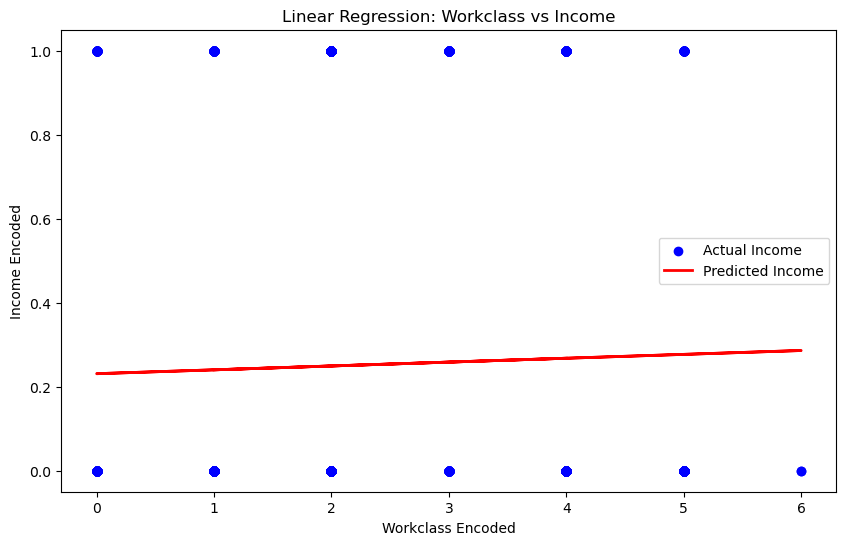

In [100]:
# Plotting the target varible with endconig

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Income')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Income')
plt.xlabel('Workclass Encoded')
plt.ylabel('Income Encoded')
plt.title('Linear Regression: Workclass vs Income')
plt.legend()
plt.show()

# Report 

The linear regrassin mesouring valuse shaows as the folowing 

Mean Squared Error (MSE): 0.18263959098076027
R-squared: -0.0007080037088100788
Intercept: 0.23102169521437493
Coefficient: 0.009200458417784847

Mean Squard Error 

As MSE measures the average squard difference between the actual and predicted valuse. The result showes as income is encoded as 0 or 1, an MSE of approximately 0.1826 suggests that there is significant error in the predictions.

R-Squared

The R-squared value indicates the proportion of the variance in the dependent variable (income) that is predictable from the independent variable workclass, as R value is -0.0007080037088100788 in this case the model does not explain any of the varaibility in the income. Also, the negative value impiles that the model performs worse than a horizontal line. 

Intercep: 

in this resilt The intercept (0.23102169521437493) represents the predicted value of 'income' when 'workclass' is zero. 


Coefficient:

As the coefficient is 0.009200458417784847 reperesnt the change in the predicted value of income for one unit change in workclass. this shows as a small positive coefficient suggested a slight increase in income with higher workclass values, but the effect is minimal. 

Overall 

The very low R-squared value indicates that 'workclass' does not significantly explain the variability in 'income'.

The high MSE relative to the range of 'income' values suggests that the predictions are not very accurate.

Implications:

Workclass alone is not a strong predictor of income. This might be because income is influenced by many other factors not included in this model.
The small coefficient further supports that 'workclass' has minimal impact on income in this dataset.

# Desisi0n tree 


In [67]:
# First we should encode  the workclass and income columns to change to the numirical values 
label_encoder_workclass = LabelEncoder()
df['workclass_encoded'] = label_encoder_workclass.fit_transform(df['workclass'])

label_encoder_income = LabelEncoder()
df['income_encoded'] = label_encoder_income.fit_transform(df['income'])

In [68]:
# Defining the features and target variable for the next steps 

X = df[['workclass_encoded']]
y = df['income_encoded']


In [69]:
X

,workclass_encoded
1,2
3,2
4,2
5,2
6,2
...,...
32556,2
32557,2
32558,2
32559,2


In [70]:
# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Training  the Decision Tree Classifier model

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [73]:
# Predicting the model on the testing varaible 
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
# Evaluating the model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Displing the outcome of the measurments 

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)



Accuracy: 0.7622760451227605
Confusion Matrix:
[[4476  104]
 [1329  119]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      4580
           1       0.53      0.08      0.14      1448

    accuracy                           0.76      6028
   macro avg       0.65      0.53      0.50      6028
weighted avg       0.71      0.76      0.69      6028



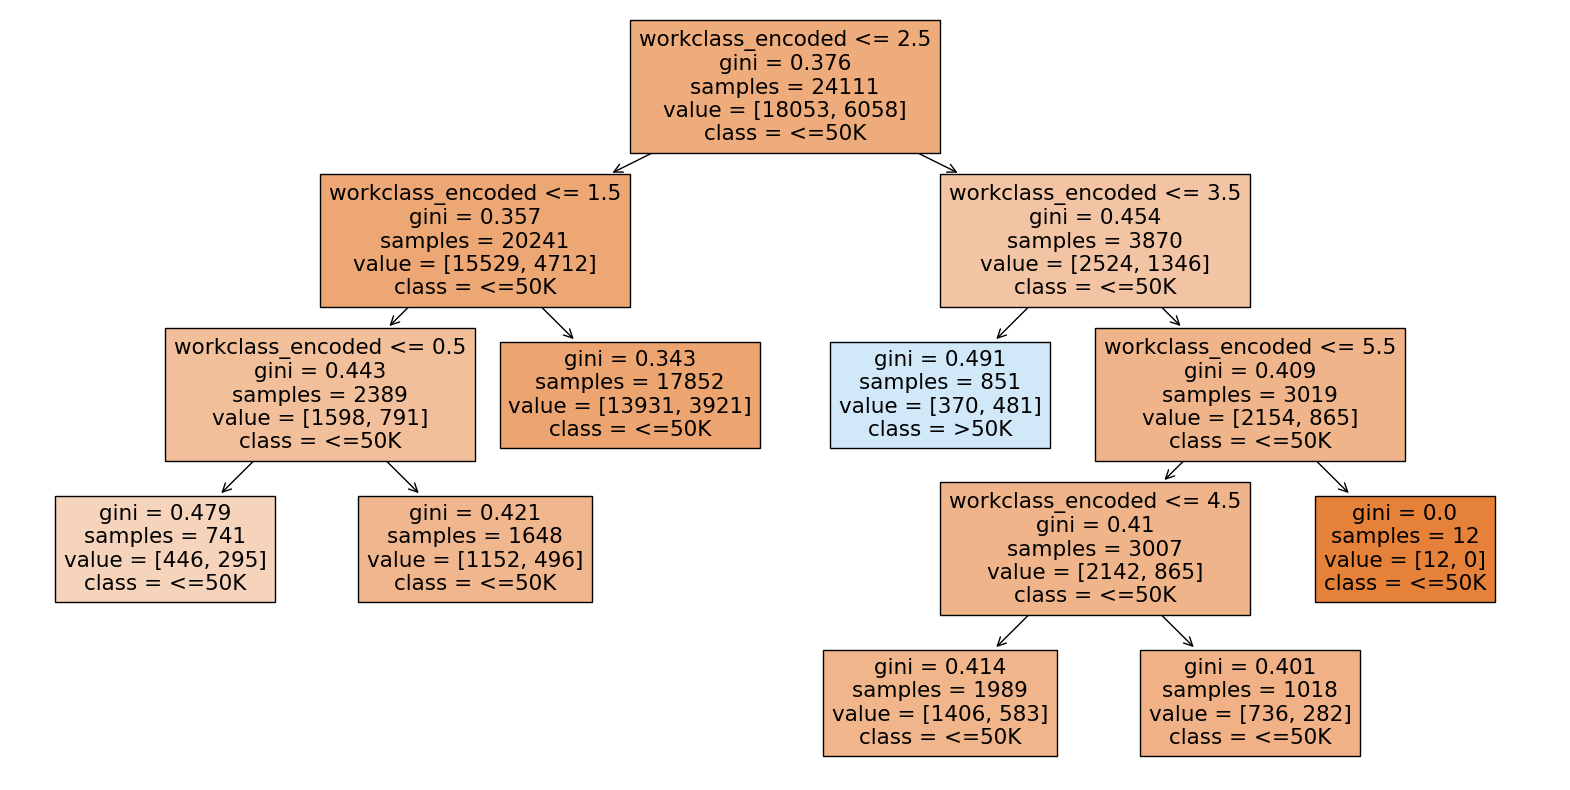

In [78]:

# Visualizing the Decision Tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=['workclass_encoded'], class_names=list(label_encoder_income.classes_), filled=True)
plt.show()

# Report for Decisin tree
 



# Implenting a Neuarl Network 


In [80]:
# Encoding the workclass, and income columns to change to numirical 
label_encoder_workclass = LabelEncoder()
df['workclass_encoded'] = label_encoder_workclass.fit_transform(df['workclass'])

label_encoder_income = LabelEncoder()
df['income_encoded'] = label_encoder_income.fit_transform(df['income'])

In [81]:
# Defining features and target variable

features = ['age', 'workclass_encoded', 'education.num', 'hours.per.week', 'capital.gain', 'capital.loss']
X = df[features]
y = df['income_encoded']

In [82]:
# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Standardizing  the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler 


StandardScaler()

In [86]:
# Training the Neural Network model

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
model.fit(X_train, y_train)


MLPClassifier(max_iter=300, random_state=42)

In [88]:

# Predicting on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [89]:

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8234903782349038
Confusion Matrix:
[[4314  266]
 [ 798  650]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4580
           1       0.71      0.45      0.55      1448

    accuracy                           0.82      6028
   macro avg       0.78      0.70      0.72      6028
weighted avg       0.81      0.82      0.81      6028



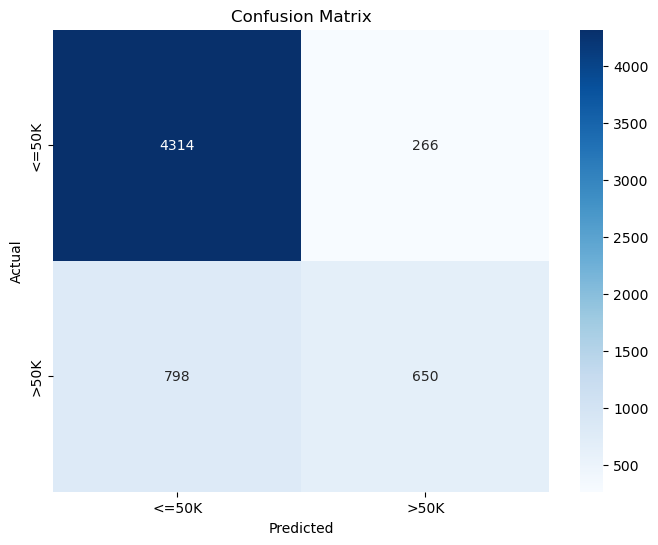

In [90]:
# Plot confusion matrix heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_income.classes_, yticklabels=label_encoder_income.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Report 

